In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split as split

In [2]:
bs = load_boston()
print(bs.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
bs.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
bs.data.shape

(506, 13)

In [5]:
boston = pd.DataFrame(bs.data, columns = bs.feature_names)
boston['MEDV'] = bs.target

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Correlation : Visual aid

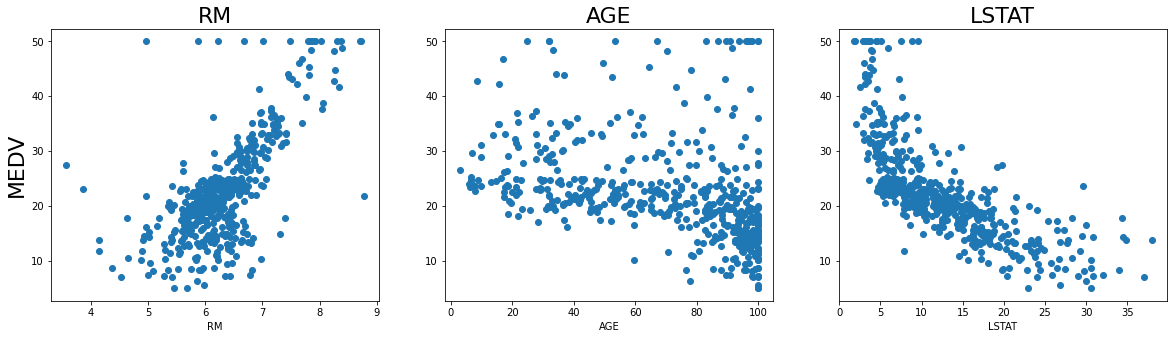

In [10]:
f, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].scatter(boston.RM , boston.MEDV)
ax[0].set_xlabel('RM')
ax[0].set_title('RM', size = 22)
ax[1].scatter(boston.AGE , boston.MEDV)
ax[1].set_xlabel('AGE')
ax[1].set_title('AGE', size = 22)
ax[2].scatter(boston.LSTAT , boston.MEDV)
ax[2].set_xlabel('LSTAT')
ax[2].set_title('LSTAT', size = 22)
ax[0].set_ylabel('MEDV', size = 22)
plt.show()

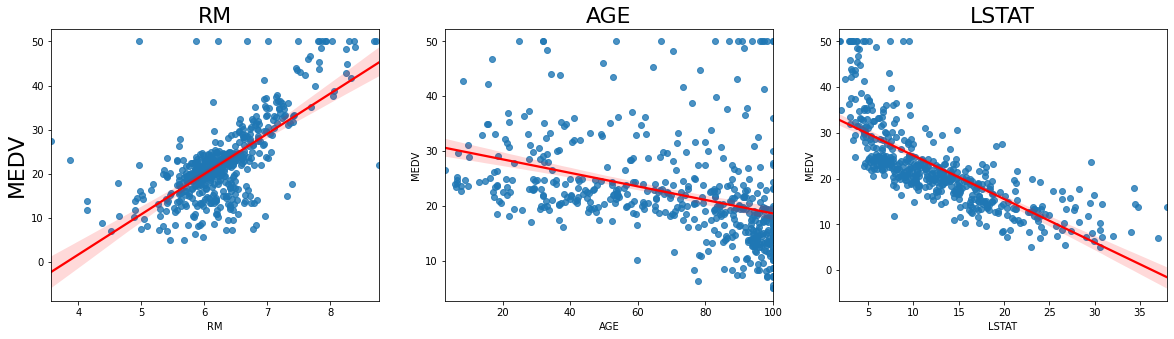

In [15]:
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.regplot(x = boston.RM , y = boston.MEDV,ax = ax[0], line_kws={'color':'red'})
ax[0].set_xlabel('RM')
ax[0].set_title('RM', size = 22)
sns.regplot(x = boston.AGE , y = boston.MEDV,  ax = ax[1],  line_kws={'color':'red'})
ax[1].set_xlabel('AGE')
ax[1].set_title('AGE', size = 22)
sns.regplot(x = boston.LSTAT , y= boston.MEDV,  ax = ax[2],  line_kws={'color':'red'})
ax[2].set_xlabel('LSTAT')
ax[2].set_title('LSTAT', size = 22)
ax[0].set_ylabel('MEDV', size = 22)
plt.show()

## Covariance

In [16]:
boston.RM.cov(boston.MEDV)

4.493445879544475

In [17]:
boston.LSTAT.cov(boston.MEDV)

-48.44753831644035

In [18]:
boston.RM.corr(boston.MEDV)

0.695359947071539

In [19]:
boston.LSTAT.corr(boston.MEDV)

-0.7376627261740148

In [20]:
boston.AGE.corr(boston.MEDV)

-0.37695456500459606

In [21]:
boston.drop(columns= 'CHAS').corr().style.background_gradient()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


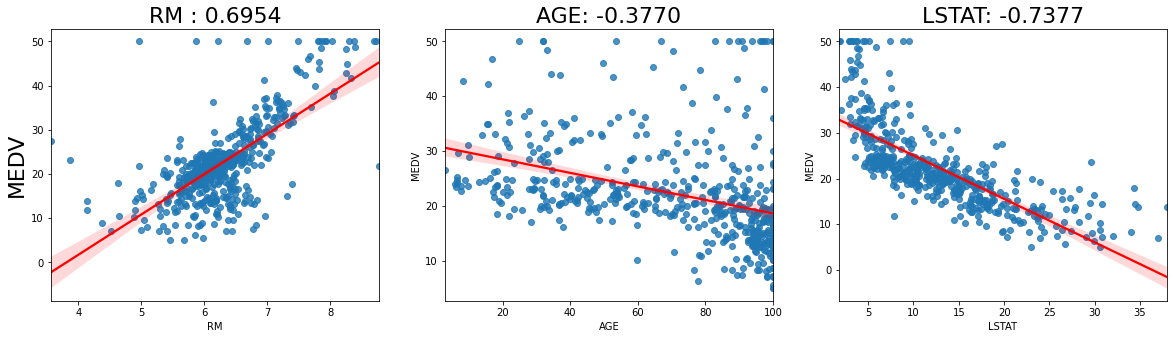

In [22]:
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.regplot(x = boston.RM , y = boston.MEDV,ax = ax[0], line_kws={'color':'red'})
ax[0].set_xlabel('RM')
ax[0].set_title('RM : {:.4f}'.format(boston.RM.corr(boston.MEDV)), size = 22)
sns.regplot(x = boston.AGE , y = boston.MEDV,  ax = ax[1],  line_kws={'color':'red'})
ax[1].set_xlabel('AGE')
ax[1].set_title('AGE: {:.4f}'.format(boston.AGE.corr(boston.MEDV)), size = 22)
sns.regplot(x = boston.LSTAT , y= boston.MEDV,  ax = ax[2],  line_kws={'color':'red'})
ax[2].set_xlabel('LSTAT')
ax[2].set_title('LSTAT: {:.4f}'.format(boston.LSTAT.corr(boston.MEDV)), size = 22)
ax[0].set_ylabel('MEDV', size = 22)
plt.show()

# Heat Map 

In [27]:
mask = np.ones_like(boston.drop(columns = 'CHAS').corr())
mask[np.tril_indices_from(mask)]=0
mask

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

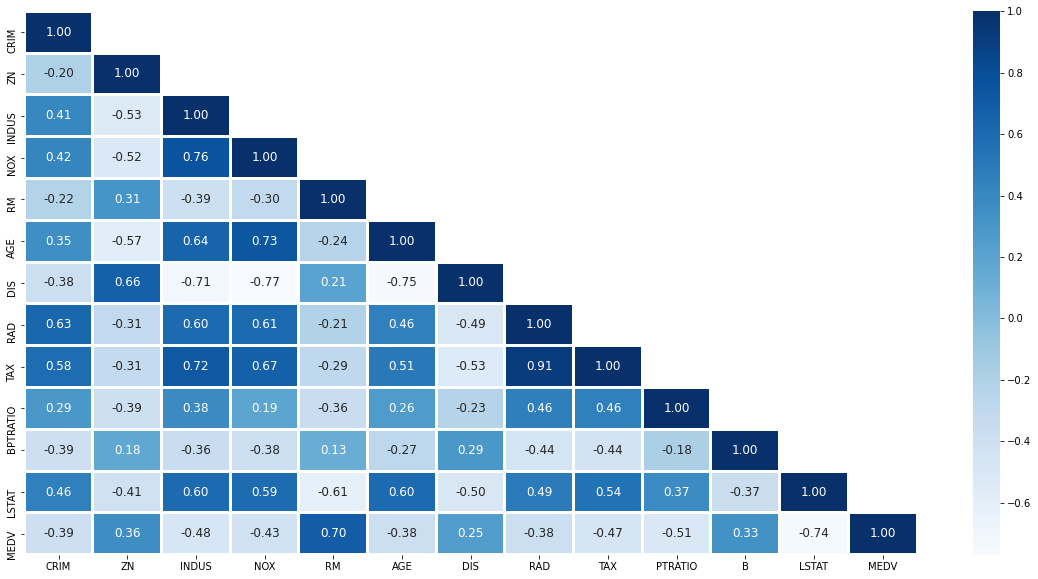

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(boston.drop(columns = 'CHAS').corr(), annot= True, annot_kws= {'size' : 12},
            cmap = 'Blues', fmt = '.2f', linewidths= 2, linecolor='white',
            mask = mask
           )
plt.show()

# Linear Regression

(-0.1, 1.0)

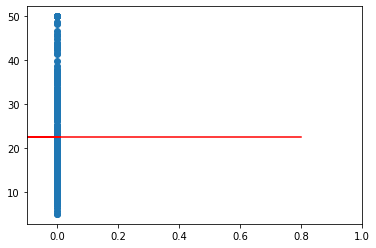

In [36]:
plt.scatter([0]*boston.MEDV.size, boston.MEDV,)
plt.plot((-0.05,0.01,-0.5,0.8),[boston.MEDV.mean()]*4, 'red')
plt.xlim((-0.1,1))

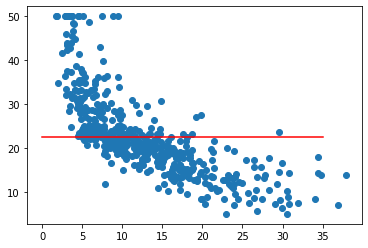

In [40]:
plt.scatter(boston.LSTAT, boston.MEDV,)
plt.plot((0,35),[boston.MEDV.mean()]*2, 'red')
#plt.xlim((-0.1,1))

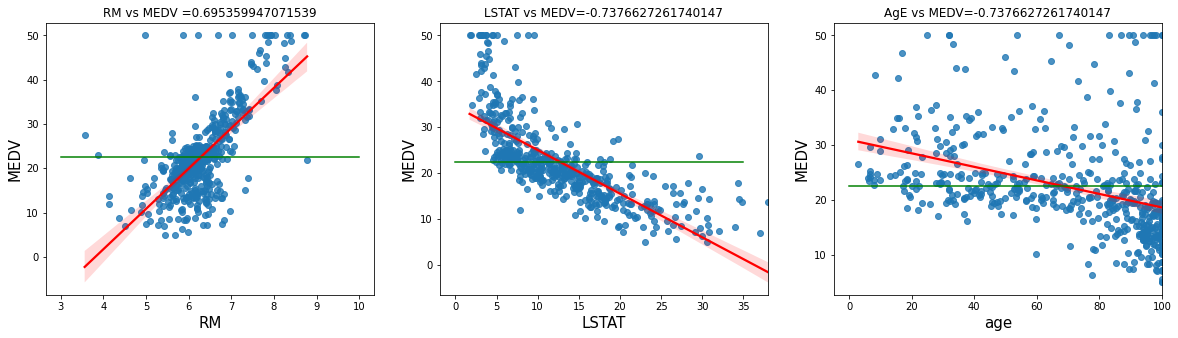

In [46]:
f, ax = plt.subplots(1,3,figsize = (20,5))
sns.regplot(x =boston.RM, y = boston.MEDV, ax = ax[0], line_kws= {'color' : 'red'})
ax[0].plot((3,10),[boston.MEDV.mean()]*2, 'green')
ax[0].set_xlabel('RM', size = 15)
ax[0].set_ylabel('MEDV', size = 15)
ax[0].set_title('RM vs MEDV =' +str(boston.MEDV.corr(boston.RM)) )

sns.regplot(x = boston.LSTAT, y = boston.MEDV, ax = ax[1], line_kws= {'color' : 'red'})
ax[1].plot((0,35),[boston.MEDV.mean()]*2, 'green')
ax[1].set_xlabel('LSTAT', size = 15)
ax[1].set_ylabel('MEDV', size = 15)
ax[1].set_title('LSTAT vs MEDV=' +str(boston.MEDV.corr(boston.LSTAT)) )

sns.regplot(x = boston.AGE, y = boston.MEDV, ax = ax[2], line_kws= {'color' : 'red'})
ax[2].plot((0,100),[boston.MEDV.mean()]*2, 'green')
ax[2].set_xlabel('age', size = 15)
ax[2].set_ylabel('MEDV', size = 15)
ax[2].set_title('AgE vs MEDV=' +str(boston.MEDV.corr(boston.LSTAT)) )
plt.show()

# split into train & test

In [47]:
train, test = split(boston, test_size = 0.30, random_state = 12)

In [48]:
train.shape

(354, 14)

In [49]:
test.shape

(152, 14)

## Model Development

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# create a model object
lm = LinearRegression()

# fit the model 
X = train[['RM']] # always needs to be dataframe
Y = train.MEDV # always a Series
lm.fit(X, Y)

LinearRegression()

In [52]:
# Parameters
lm.coef_ # beta value(s)

array([9.39825343])

In [53]:
lm.intercept_ # intercept

-36.613232703188416

In [54]:
lm.score(X, Y) # R squared value

0.4840550583908294

## Statsmodels method

In [55]:
from statsmodels.formula.api import ols # ordinary least square 

In [56]:
mod = ols('MEDV ~ RM', data = train)
lm_fit = mod.fit()

lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     330.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.60e-52
Time:                        14:25:33   Log-Likelihood:                -1166.7
No. Observations:                 354   AIC:                             2337.
Df Residuals:                     352   BIC:                             2345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.6132      3.257    -11.242      0.000     -43.018     -30.208
RM             9.3983      0.517     18.173      0.000       8.381      10.415
==============================================================================
Omnibus:                      104.158   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.565
Skew:                           1.058   Prob(JB):                    2.45e-146
Kurtosis:                       9.402   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## multiple linear regression

In [57]:
lm_multi = LinearRegression()
lm_multi.fit(train.drop(columns='MEDV'), train.MEDV)

LinearRegression()

In [58]:
train.CHAS = train.CHAS.astype(str)

/Users/nimisha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
formula = 'MEDV ~ ' + ' + '.join(train.drop(columns = 'MEDV'))
formula

'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [60]:
lm_fit_multi = ols(formula , data = train).fit()
lm_fit_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     77.75
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.09e-93
Time:                        14:26:57   Log-Likelihood:                -1039.6
No. Observations:                 354   AIC:                             2107.
Df Residuals:                     340   BIC:                             2161.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.1815      6.207      5.346      0.000      20.972      45.390
CHAS[T.1.0]     3.3410      0.993      3.365      0.001       1.388       5.294
CRIM           -0.1032      0.034     -3.040      0.003      -0.170      -0.036
ZN              0.0538      0.016      3.285      0.001       0.022       0.086
INDUS           0.0655      0.071      0.923      0.357      -0.074       0.205
NOX           -17.2285      4.648     -3.707      0.000     -26.371      -8.086
RM              3.5774      0.524      6.830      0.000       2.547       4.608
AGE             0.0199      0.016      1.265      0.207      -0.011       0.051
DIS            -1.3503      0.240     -5.626      0.000      -1.822      -0.878
RAD             0.3230      0.074      4.390      0.000       0.178       0.468
TAX            -0.0138      0.004     -3.272      0.001      -0.022      -0.006
PTRATIO        -0.7836      0.154     -5.074      0.000      -1.087      -0.480
B               0.0104      0.003      3.357      0.001       0.004       0.017
LSTAT          -0.6088      0.061    -10.009      0.000      -0.728      -0.489
==============================================================================
Omnibus:                      142.893   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.442
Skew:                           1.704   Prob(JB):                    7.66e-138
Kurtosis:                       8.585   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ANOVA : overall feasibilty of Regression 
      - H0 : all the beta values are non significant 
      -    : none of varaibles are significant
      -    : all the regression terms are non significant 
      -    : hence regression is not at all possible

# t test being performed 
    - H0 : the corresponding beta value is non significant 
    -    : the corresponding variable is non significant 
    - p value to reject the H0 
    - for whatever variable pvalue is high ---> we fail to reject the null, hence variable is non significcant 

# AIC - Akeike information Criterion = 2p - 2 ln L
# BIC - Baysean Information Criterion = pln n - 2ln L
    - based on Information theory : information loss
    - lower value of AIC & BIC
    - Relative 
    - p in the equation : no. of factors / x variables 

# Assumptions 
    1. the relationship is supposed to be LINEAR. Dependent varaibale is a linear function of independent variable / error term
    2. errors are Normally Distributed. - regression is robust
    3. homoscedasticity : Equal Variance in the errors a accross dataset
    4. independence of the independent varaibles : multicollinearity 

# Residual Analysis  :
    - predicted / estimated --> ycap
    - residuals = y - ycap 

In [61]:
y_cap = lm.predict(train[['RM']])

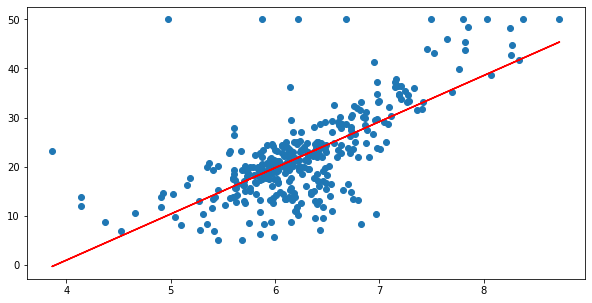

In [62]:
plt.figure(figsize = (10,5))
plt.scatter(train.RM, train.MEDV)
plt.plot(train.RM, y_cap,color = 'red')
plt.show()

In [63]:
# Residual analysis 
# fitted(ycap) vs error( y - ycap)

In [66]:
ycap = lm_multi.predict(train.drop(columns ='MEDV'))
y = train.MEDV
residual = ycap - y

# 1. Linearity Assumption

/Users/nimisha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


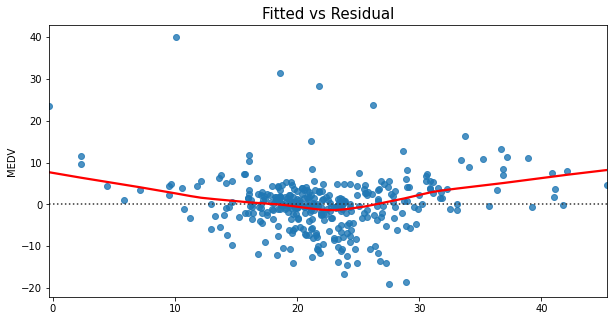

In [65]:
plt.figure(figsize = (10,5))
sns.residplot(y_cap , 'MEDV', data = train, lowess = True, line_kws={'color' : 'red'})
plt.title('Fitted vs Residual', size = 15)
plt.show()

In [ ]:
# develop 1 by by plot of Residual vs predictor 

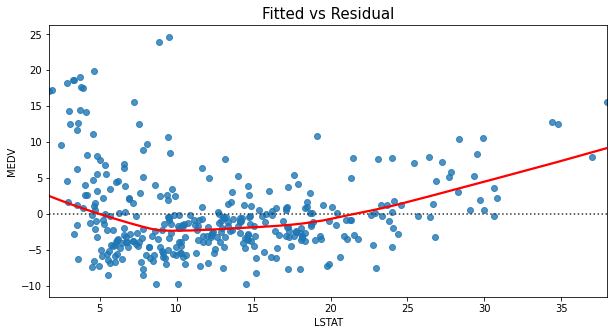

In [75]:
plt.figure(figsize = (10,5))
sns.residplot(x= 'LSTAT' , y = 'MEDV', data = train,lowess = True, line_kws={'color' : 'red'})
plt.title('Fitted vs Residual', size = 15)
plt.show()

# 2. Normality of errors

In [76]:
import scipy.stats as stats

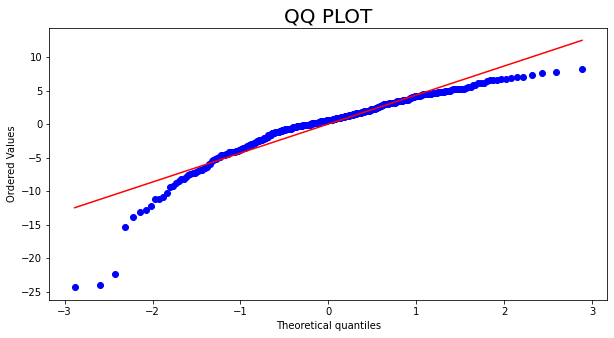

In [77]:
plt.figure(figsize = (10,5))
stats.probplot(residual, dist='norm', plot = plt)
plt.title('QQ PLOT', size = 20)
plt.show()

# 3. Homoscedasticity 

## Scale - Location plot 

## sqrt of standardised residuals against fitted values

In [78]:
import numpy as np

In [79]:
sqrt_norm_residuals =  np.sqrt(np.abs(residual))

/Users/nimisha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


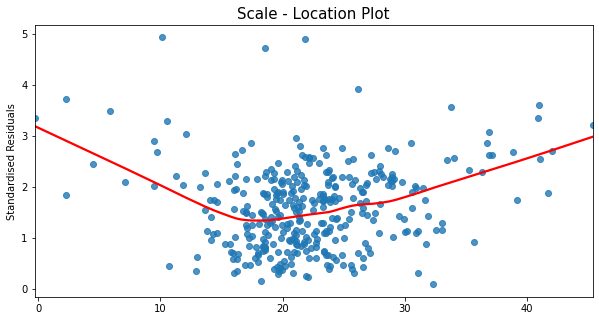

In [80]:
plt.figure(figsize = (10,5))
sns.regplot(y_cap ,sqrt_norm_residuals , 
              lowess = True, line_kws={'color' : 'red'},
              scatter = True, )
plt.ylabel('Standardised Residuals')
plt.title('Scale - Location Plot', size = 15)
plt.show()

## 3. Independencce of Predictor


#### MULTICOLLINEARITY SHOULD NOT BE THERE 

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# vif requires a data with intercept column
x_data = train.drop(columns= ['MEDV', 'CHAS'])
x_data['intercept'] = 1
VIF = pd.DataFrame()
VIF['variables'] = x_data.columns
VIF['vif'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('variables').drop(index = 'intercept').T

In [82]:
VIF

variables,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.691709,2.285545,3.83903,4.579622,2.029987,3.220064,4.164529,6.52172,7.939726,1.703479,1.345075,3.128695


In [85]:
[vif(x_data.values, i) for i in range(x_data.shape[1])]

[1.6917093934857683,
 2.2855452676821724,
 3.8390299886855157,
 4.579622069643085,
 2.02998731963243,
 3.220064421160151,
 4.164529420776938,
 6.521719833590685,
 7.939726069863535,
 1.7034791993024063,
 1.3450747777559524,
 3.128694963021174,
 625.9861159355568]

In [ ]:
# identify the variables 
# transformation : square or cube or logs 

In [ ]:
# INDUS & AGE ar non significant 

In [86]:
from sklearn.metrics import mean_squared_error as mse

In [87]:
# VIF 
vif_d = {}
drop_cols = ['MEDV', 'INDUS', 'AGE']
x_data = train.drop(columns= drop_cols + ['CHAS'])
x_data['intercept'] = 1
VIF = pd.DataFrame()
VIF['variables'] = x_data.columns
VIF['vif'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('variables').drop(index = 'intercept').T
VIF

variables,CRIM,ZN,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.690108,2.249686,3.947988,1.94857,3.452718,5.945622,6.343201,1.673183,1.341081,2.702498


In [88]:
# model
form =   'MEDV ~ '+ ' + '.join(train.drop(columns = drop_cols))
mod_lm =ols(form, data = train).fit()
fitted = mod_lm.fittedvalues
resid = mod_lm.resid
rmse = mse(y_true = train.MEDV, y_pred = fitted, squared = False)
print('R Squared = {:.3f}\tAdj R Squared = {:.3f}\t RMSE = {}'.format(mod_lm.rsquared, mod_lm.rsquared_adj, rmse))

R Squared = 0.747	Adj R Squared = 0.738	 RMSE = 4.5782479484486185


## Root Mean Squared Error : Error remaining 

In [ ]:
train.drop(columns = drop_cols).columns

In [94]:
# VIF 
drop_cols = ['MEDV', 'INDUS', 'AGE','RAD', 'TAX', 'DIS', 'NOX', 'ZN']
x_data = train.drop(columns= drop_cols + ['CHAS'])
x_data['intercept'] = 1
VIF = pd.DataFrame()
VIF['variables'] = x_data.columns
VIF['vif'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('variables').drop(index = 'intercept').T
VIF

variables,CRIM,RM,PTRATIO,B,LSTAT
vif,1.334842,1.849541,1.20743,1.244159,2.183129


In [95]:
# model
form =   'MEDV ~ '+ ' + '.join(train.drop(columns = drop_cols))
mod_lm =ols(form, data = train).fit()
fitted = mod_lm.fittedvalues
resid = mod_lm.resid
rmse = mse(y_true = train.MEDV, y_pred = fitted, squared = False)
print('R Squared = {:.3f}\tAdj R Squared = {:.3f}\t RMSE = {}'.format(mod_lm.rsquared, mod_lm.rsquared_adj, rmse))

R Squared = 0.703	Adj R Squared = 0.698	 RMSE = 4.9577559857268785


In [98]:
# final model
mod_lm = ols('MEDV ~ CRIM + CHAS + RM + PTRATIO + B + LSTAT', data = train).fit()

mod_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.89e-88
Time:                        15:02:22   Log-Likelihood:                -1069.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     347   BIC:                             2179.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.6824      5.164      1.875      0.062      -0.474      19.839
CHAS[T.1.0]     4.2881      1.036      4.140      0.000       2.251       6.325
CRIM           -0.0337      0.032     -1.039      0.300      -0.097       0.030
RM              4.4592      0.538      8.289      0.000       3.401       5.517
PTRATIO        -0.6760      0.140     -4.826      0.000      -0.951      -0.400
B               0.0110      0.003      3.427      0.001       0.005       0.017
LSTAT          -0.5394      0.055     -9.859      0.000      -0.647      -0.432
==============================================================================
Omnibus:                      180.752   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1155.611
Skew:                           2.084   Prob(JB):                    1.15e-251
Kurtosis:                      10.808   Cond. No.                     7.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
mod_lm = ols('MEDV ~ CHAS + RM + PTRATIO + B + LSTAT', data = train).fit()
mod_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           3.66e-89
Time:                        15:02:45   Log-Likelihood:                -1069.6
No. Observations:                 354   AIC:                             2151.
Df Residuals:                     348   BIC:                             2174.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.9816      5.156      1.936      0.054      -0.160      20.123
CHAS[T.1.0]     4.3207      1.035      4.173      0.000       2.284       6.357
RM              4.4281      0.537      8.243      0.000       3.372       5.485
PTRATIO        -0.6955      0.139     -5.010      0.000      -0.969      -0.422
B               0.0119      0.003      3.836      0.000       0.006       0.018
LSTAT          -0.5538      0.053    -10.459      0.000      -0.658      -0.450
==============================================================================
Omnibus:                      173.265   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1064.433
Skew:                           1.992   Prob(JB):                    7.26e-232
Kurtosis:                      10.502   Cond. No.                     7.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Influential Points

In [ ]:
#di 
# d0
sub_data = train.reset_index(drop = True).drop(index = 0)

In [ ]:
m = ols('MEDV ~ CHAS + RM + PTRATIO + B + LSTAT', sub_data).fit()
ycap_i = m.fittedvalues

In [ ]:
m = ols('MEDV ~ CHAS + RM + PTRATIO + B + LSTAT', train.reset_index(drop= True)).fit()
ycap = m.fittedvalues

In [100]:
inf = mod_lm.get_influence()

In [101]:
c, p = inf.cooks_distance

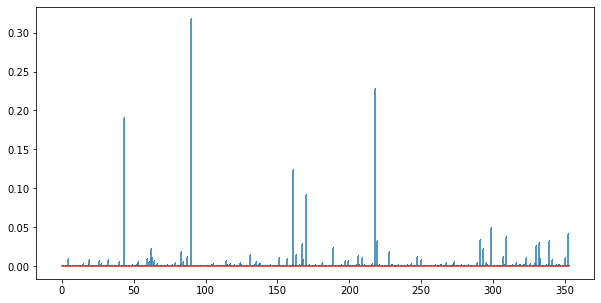

In [104]:
plt.figure(figsize = (10,5))
plt.stem(range(train.shape[0]), c, markerfmt=',', use_line_collection= True,)
plt.show()

In [105]:
# influential points : cd > 4/n
4/train.shape[0]

0.011299435028248588

In [108]:
final = train[(c<0.11)].drop(columns =  [ 'INDUS', 'AGE', 'RAD', 'TAX', 'DIS', 'NOX', 'ZN', 'CRIM'])

In [109]:
mod_lm = ols('MEDV ~ CHAS + RM + PTRATIO + B + LSTAT', data = final).fit()
mod_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.93e-105
Time:                        15:12:12   Log-Likelihood:                -1004.2
No. Observations:                 350   AIC:                             2020.
Df Residuals:                     344   BIC:                             2044.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0787      4.630     -0.017      0.986      -9.185       9.027
CHAS[T.1.0]     2.2514      0.929      2.424      0.016       0.424       4.078
RM              5.9224      0.491     12.070      0.000       4.957       6.887
PTRATIO        -0.8423      0.120     -7.000      0.000      -1.079      -0.606
B               0.0156      0.003      5.744      0.000       0.010       0.021
LSTAT          -0.3994      0.048     -8.342      0.000      -0.494      -0.305
==============================================================================
Omnibus:                      116.059   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.939
Skew:                           1.298   Prob(JB):                    1.95e-131
Kurtosis:                       8.877   Cond. No.                     7.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
mse(y_true = final.MEDV, y_pred = mod_lm.fittedvalues, squared = False)

4.264530390635789

In [111]:
drop_cols = ['MEDV']
x_data = final.drop(columns= drop_cols + ['CHAS'])
x_data['intercept'] = 1
VIF = pd.DataFrame()
VIF['variables'] = x_data.columns
VIF['vif'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('variables').drop(index = 'intercept').T
VIF

variables,RM,PTRATIO,B,LSTAT
vif,1.981552,1.185467,1.17747,2.233313


In [112]:
# predictions 
test.CHAS = test.CHAS.astype(str)
mod_lm.predict(test)

/Users/nimisha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


334    23.640251
394    17.417450
404     9.854062
236    29.022134
307    28.153769
         ...    
143    15.546696
354    17.670347
364    40.560726
370    31.627885
255    23.362205
Length: 152, dtype: float64

In [113]:
mse(y_true = test.MEDV, y_pred = mod_lm.predict(test), squared = False)

5.288650590863749